In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

##  加载数据

In [3]:
df_randomE = pd.read_csv('original_data_files/E_global_v46.csv', index_col=0)

In [4]:
df_randomE

,Resource01,Resource02,Resource03,Resource04,Resource05,Resource06,Resource07,Resource08,Resource09,Resource10
GlobalSpecies0001,-0.203511,0.000000,0.452666,0.000000,0.000000,0.000000,-0.296489,0.000000,0.000000,0.547334
GlobalSpecies0002,0.000000,0.389201,0.000000,0.000000,0.000000,0.000000,0.344408,0.266391,0.000000,0.000000
GlobalSpecies0003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.487939,-0.500000,0.000000,0.512061
GlobalSpecies0004,0.242347,0.259922,0.244543,0.000000,0.000000,0.000000,0.000000,0.000000,0.253187,0.000000
GlobalSpecies0005,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
GlobalSpecies0996,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,0.000000
GlobalSpecies0997,-0.110725,0.000000,0.000000,0.000000,0.000000,-0.389275,1.000000,0.000000,0.000000,0.000000
GlobalSpecies0998,0.000000,0.144075,0.195240,0.182823,0.000000,0.148205,0.000000,-0.500000,0.167472,0.162185
GlobalSpecies0999,0.233303,0.000000,0.175073,0.208130,0.177794,0.000000,0.000000,0.205700,-0.500000,0.000000


In [5]:
species_randomE_dict = {}

# 遍历 DataFrame 的每一行
for microbe_name, row_data in df_randomE.iterrows():
    # 将该行的所有资源消耗值转换成一个列表 (向量)
    # row_data 是一个 Pandas Series，.values 会将其转换为 NumPy 数组，.tolist() 转换为列表
    resource_vector = row_data.tolist()
    species_randomE_dict[microbe_name] = resource_vector

In [6]:
def load_pretrained_embeddings(vectors_file):
    with open(vectors_file, 'r') as f:
        vectors = {}
        for line in f:
            vals = line.rstrip().split(' ')
            if vals[0] != '<unk>':
                vectors[vals[0]] = [float(x) for x in vals[1:]]
    return vectors

embedding_dict = load_pretrained_embeddings('/softerware/analysis_distance_simul_V4/results_output/abundance_percentile/subset_1/result_vectors/embeddings_100.txt')

In [7]:
df_sim_embedding = pd.DataFrame(cosine_similarity(np.array([embedding_dict[key] for key in embedding_dict.keys()])), index=embedding_dict.keys(), columns=embedding_dict.keys())

In [8]:
df_sim_randomE = pd.DataFrame(cosine_similarity(np.array([species_randomE_dict[key] for key in embedding_dict.keys()])), index=embedding_dict.keys(), columns=embedding_dict.keys())

In [9]:
df_sim_randomE

,GlobalSpecies0001,GlobalSpecies0002,GlobalSpecies0003,GlobalSpecies0004,GlobalSpecies0005,GlobalSpecies0006,GlobalSpecies0007,GlobalSpecies0008,GlobalSpecies0009,GlobalSpecies0010,...,GlobalSpecies0991,GlobalSpecies0992,GlobalSpecies0993,GlobalSpecies0994,GlobalSpecies0995,GlobalSpecies0996,GlobalSpecies0997,GlobalSpecies0998,GlobalSpecies0999,GlobalSpecies1000
GlobalSpecies0001,1.000000,-0.219629,0.196638,0.154127,0.000000,0.000000,0.321753,0.166550,0.000000,-0.159772,...,0.114321,-0.307461,0.202198,-0.333101,-0.198872,-0.228642,-0.318980,0.343916,0.059335,0.243063
GlobalSpecies0002,-0.219629,1.000000,0.068901,0.346307,-0.203996,0.000000,0.000000,-0.263739,-0.298040,0.000000,...,0.000000,0.000000,0.012820,0.323482,0.000000,0.000000,0.546664,-0.204106,0.139514,0.123567
GlobalSpecies0003,0.196638,0.068901,1.000000,0.000000,0.258149,0.000000,0.000000,-0.251922,0.000000,0.000000,...,0.000000,-0.264376,-0.501222,0.761993,0.000000,0.000000,0.522171,0.594272,-0.176549,-0.592502
GlobalSpecies0004,0.154127,0.346307,0.000000,1.000000,0.000000,0.000000,0.574626,0.452737,-0.232390,0.302822,...,-0.216677,0.000000,-0.121826,0.000000,0.376928,0.206985,-0.049729,0.394261,-0.080975,0.470239
GlobalSpecies0005,0.000000,-0.203996,0.258149,0.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.800000,-0.226694,0.200000,0.000000,0.000000,-0.322748,0.550483,-0.136781,-0.174200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GlobalSpecies0996,-0.228642,0.000000,0.000000,0.206985,0.000000,0.000000,-0.263263,-0.400000,0.000000,0.559031,...,-0.400000,0.000000,-0.224898,0.000000,0.695835,1.000000,-0.091802,-0.115757,0.642747,-0.187584
GlobalSpecies0997,-0.318980,0.546664,0.522171,-0.049729,-0.322748,-0.322748,0.000000,-0.414550,0.000000,-0.064150,...,0.045901,-0.322748,-0.317483,0.829100,-0.079849,-0.091802,1.000000,-0.082656,-0.035604,-0.604993
GlobalSpecies0998,0.343916,-0.204106,0.594272,0.394261,0.550483,0.078512,0.160013,0.231515,-0.099585,0.148886,...,0.252736,0.092776,-0.183573,0.345603,0.000000,-0.115757,-0.082656,1.000000,-0.262796,-0.081922
GlobalSpecies0999,0.059335,0.139514,-0.176549,-0.080975,-0.136781,-0.138396,-0.468985,-0.664953,0.236450,0.227611,...,0.121657,0.000000,0.295784,-0.136781,0.435970,0.642747,-0.035604,-0.262796,1.000000,-0.192701


## embedding 的降维可视化

In [10]:
V_embeddings_df = pd.DataFrame(np.array([embedding_dict[key] for key in embedding_dict.keys()]), index=embedding_dict.keys())

In [11]:
E_global_df = pd.DataFrame(np.array([species_randomE_dict[key] for key in embedding_dict.keys()]), index=embedding_dict.keys(), columns=df_randomE.columns)

In [12]:
E_global_df

,Resource01,Resource02,Resource03,Resource04,Resource05,Resource06,Resource07,Resource08,Resource09,Resource10
GlobalSpecies0001,-0.203511,0.000000,0.452666,0.000000,0.000000,0.000000,-0.296489,0.000000,0.000000,0.547334
GlobalSpecies0002,0.000000,0.389201,0.000000,0.000000,0.000000,0.000000,0.344408,0.266391,0.000000,0.000000
GlobalSpecies0003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.487939,-0.500000,0.000000,0.512061
GlobalSpecies0004,0.242347,0.259922,0.244543,0.000000,0.000000,0.000000,0.000000,0.000000,0.253187,0.000000
GlobalSpecies0005,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
GlobalSpecies0996,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,0.000000
GlobalSpecies0997,-0.110725,0.000000,0.000000,0.000000,0.000000,-0.389275,1.000000,0.000000,0.000000,0.000000
GlobalSpecies0998,0.000000,0.144075,0.195240,0.182823,0.000000,0.148205,0.000000,-0.500000,0.167472,0.162185
GlobalSpecies0999,0.233303,0.000000,0.175073,0.208130,0.177794,0.000000,0.000000,0.205700,-0.500000,0.000000


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# 假设 V_embeddings_df 是您的微生物嵌入DataFrame (行为微生物，列为嵌入特征)
# 假设 E_global_df 是您的资源利用DataFrame (行为微生物，列为资源，与V_embeddings_df对齐)


# 确保 E_global_df 的微生物顺序与 V_embeddings_df 一致
E_global_df = E_global_df.loc[V_embeddings_df.index]
# --- 结束示例数据 ---


# 1. 对嵌入向量进行PCA降维
pca = PCA(n_components=2)
V_reduced_np = pca.fit_transform(V_embeddings_df.values)
V_reduced_df = pd.DataFrame(V_reduced_np, columns=['PC1', 'PC2'], index=V_embeddings_df.index)


# tsne = TSNE(n_components=2, random_state=42)
# V_reduced_tsne = tsne.fit_transform(V_embeddings_df.values)
# V_reduced_df = pd.DataFrame(V_reduced_tsne, columns=['PC1', 'PC2'], index=V_embeddings_df.index)

# 2. 计算资源向量与PC轴的相关性作为箭头坐标
resource_arrows = []
for resource_col in E_global_df.columns:
    # corr_pc1 = np.corrcoef(E_global_df[resource_col], V_reduced_df['PC1'])[0, 1]
    # corr_pc2 = np.corrcoef(E_global_df[resource_col], V_reduced_df['PC2'])[0, 1]
    
    # 或者使用pandas的corr()方法，更简洁一些
    # 注意：这里我们是看每个微生物的PC得分与它对某个资源的利用值的关系
    corr_pc1 = E_global_df[resource_col].corr(V_reduced_df['PC1'], method='spearman') # 或 'pearson'
    corr_pc2 = E_global_df[resource_col].corr(V_reduced_df['PC2'], method='spearman')
    
    resource_arrows.append({'resource': resource_col, 'pc1_loading': corr_pc1, 'pc2_loading': corr_pc2})



In [15]:
df_resource_arrows = pd.DataFrame(resource_arrows)

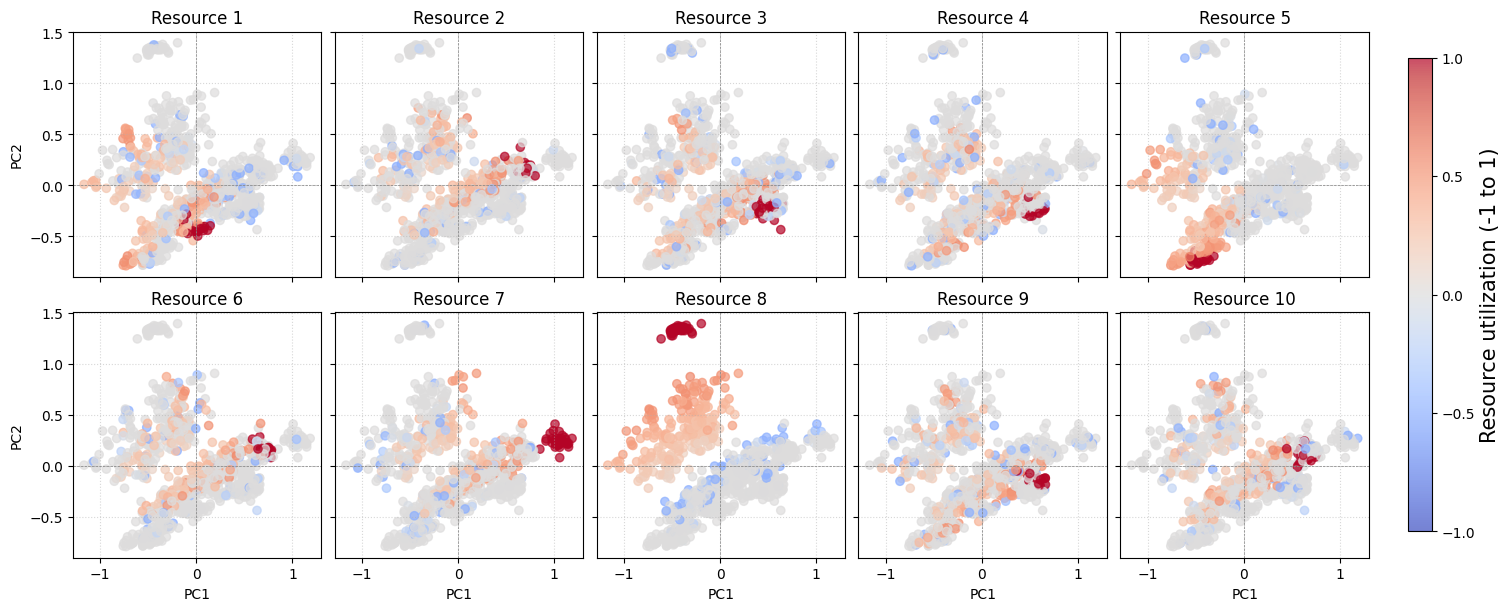

In [17]:
df_arrows = pd.DataFrame(resource_arrows)


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6), sharex=True, sharey=True) # 调整figsize
axes = axes.flatten() # 将2D轴数组展平为1D，方便迭代

sc_mappable = None # 用于存储最后一个scatter plot的mappable对象，给colorbar用
# 3. 绘图
# 对于方案一（分面图）:
for i, resource_col_name in enumerate(E_global_df.columns):
    if i >= len(axes): # 如果资源数多于子图数，安全退出循环
        print(f"警告: 资源数量 ({len(E_global_df.columns)}) 大于可用子图数量 ({len(axes)})。仅绘制前 {len(axes)} 个资源。")
        break
    
    ax = axes[i]
    
    # 使用固定的 vmin 和 vmax 来统一颜色条范围
    # 数据值超出[-1, 1]范围的点，其颜色将被裁剪到色阶的最小值或最大值颜色
    current_scatter = ax.scatter(V_reduced_df['PC1'], V_reduced_df['PC2'], 
                                 c=E_global_df[resource_col_name], 
                                 cmap='coolwarm',  # coolwarm 是一个很好的发散色阶，中心为白色
                                 alpha=0.7,
                                  vmin=-1,      # 固定最小值
                                 vmax=1)       # 固定最大值
    
    if sc_mappable is None: # 保存第一个（或任何一个，因为它们共享cmap和norm）
        sc_mappable = current_scatter

    ax.set_title(f"Resource {i+1}") # 子图标题，使用1-based的资源索引
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.axhline(0, color='grey', lw=0.5, linestyle='--') # 添加参考线
    ax.axvline(0, color='grey', lw=0.5, linestyle='--')

    # 仅在外部子图上显示轴标签以减少混乱
    if i >= (len(axes) - 5): # 最后一行子图 (假设ncols=5)
        ax.set_xlabel('PC1')
    if i % 5 == 0: # 最左边一列子图 (假设ncols=5)
        ax.set_ylabel('PC2')

# 隐藏任何未使用的子图 (如果资源数少于10个)
for j in range(len(E_global_df.columns), len(axes)):
    fig.delaxes(axes[j])

# 添加一个统一的颜色条在图的右侧
if sc_mappable is not None: # 确保至少绘制了一个散点图
    # fig.subplots_adjust(right=0.85) # 为颜色条腾出空间，可能需要根据figsize调整
    # cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7]) # [left, bottom, width, height] 手动定位
    # cbar = fig.colorbar(sc_mappable, cax=cbar_ax, label='Resource Utilization')
    
    # 更常用的方法是让matplotlib自动处理位置，但可能需要调整
    # 'ax' 参数可以是一个轴对象列表
    cbar = fig.colorbar(sc_mappable, ax=axes.ravel().tolist(), label='Resource utilization (-1 to 1)', 
                        shrink=0.9, aspect=20, pad=0.03) # shrink, aspect, pad 用于调整外观
    cbar.set_label('Resource utilization (-1 to 1)', fontsize=15)
    cbar.set_ticks(np.linspace(-1, 1, 5)) # 设置颜色条上的刻度，例如：-1, -0.5, 0, 0.5, 1
else:
    print("没有绘制任何散点图，无法添加颜色条。")

# 添加总标题
# plt.suptitle("Microbial Embeddings Colored by Resource Utilization (Fixed Scale -1 to 1)", fontsize=16, y=1.02)


# 尝试使用 constrained_layout 自动调整间距，或者 fallback 到 tight_layout
try:
    fig.set_constrained_layout_pads(w_pad=0.05, h_pad=0.05, hspace=0.1, wspace=0.05)
    fig.set_constrained_layout(True)
except AttributeError:
    plt.tight_layout()
    # 如果使用tight_layout后颜色条或标题仍有问题，可能需要手动 fig.subplots_adjust
    # fig.subplots_adjust(top=0.92, right=0.85) # 示例


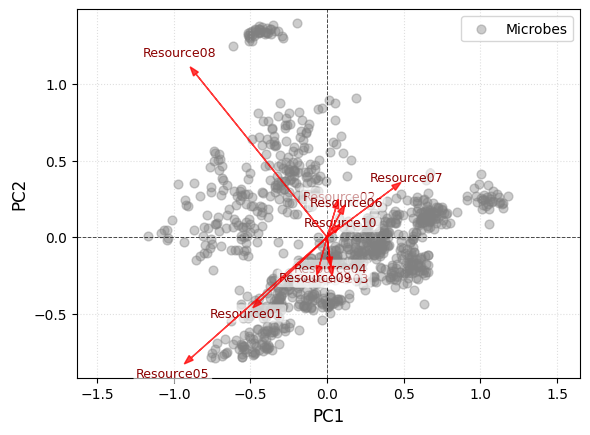

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 通常与matplotlib一起使用
from sklearn.decomposition import PCA # 假设 pca 对象已定义

# 3. 绘图 (改进版)
fig, ax = plt.subplots(figsize=(6, 4.5)) # 1. 增大 figsize

# 绘制微生物散点
ax.scatter(V_reduced_df['PC1'], V_reduced_df['PC2'], alpha=0.4, label='Microbes', s=40, color='grey')

# 计算基础的缩放因子，与数据点的散布程度相关
# 这个因子帮助将loadings（通常在-1到1之间）映射到与PC得分相似的尺度
base_arrow_scale = max(V_reduced_df['PC1'].std(), V_reduced_df['PC2'].std(), 1.0) # 确保至少为1，以防std非常小

# 2. 引入额外的箭头长度延长因子
arrow_length_extension_factor = 1.8 # 尝试将箭头延长到原始估计长度的1.8倍，可以调整这个值

# 4. 文字偏移比例 (相对于新箭头的末端)
text_offset_ratio = 1.08 # 将文字放置在新箭头尖端外侧一点点 (例如，5%到8%的距离)

for i, row in df_arrows.iterrows():
    # 原始按数据散布缩放的箭头向量分量
    dx_base = row['pc1_loading'] * base_arrow_scale
    dy_base = row['pc2_loading'] * base_arrow_scale

    # 延长后的箭头向量分量，用于绘制
    dx_draw = dx_base * arrow_length_extension_factor
    dy_draw = dy_base * arrow_length_extension_factor
    
    # 3. 调整箭头头部大小
    # 让头部大小与原始数据散布相关，但可以给一个最小尺寸或按延长后的长度调整
    # 方案A: 头部大小与 base_arrow_scale (数据散布) 相关
    head_w = 0.04 * base_arrow_scale 
    head_l = 0.06 * base_arrow_scale
    # 方案B: 头部大小与绘制的箭头长度相关 (更动态，但可能导致非常小的箭头头部也小)
    # current_arrow_length = np.sqrt(dx_draw**2 + dy_draw**2)
    # head_w = 0.05 * current_arrow_length if current_arrow_length > 0 else 0.01 * base_arrow_scale
    # head_l = 0.08 * current_arrow_length if current_arrow_length > 0 else 0.015 * base_arrow_scale
    # 我们继续使用方案A，因为它提供了与数据点更一致的视觉尺度

    ax.arrow(0, 0, 
             dx_draw, 
             dy_draw,
             head_width=head_w, 
             head_length=head_l, 
             fc='red', ec='red', length_includes_head=True, alpha=0.75, zorder=5) # zorder确保箭头在点之上
    
    ax.text(dx_draw * text_offset_ratio, 
            dy_draw * text_offset_ratio, 
            row['resource'], color='darkred', ha='center', va='center', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.6)) # 加个半透明背景框

# 调整坐标轴范围以适应可能变长的箭头和文字
# 可以基于散点和箭头末端位置动态调整，或稍微放大现有范围
all_x_points = np.concatenate([V_reduced_df['PC1'].values, df_arrows['pc1_loading'].values * base_arrow_scale * arrow_length_extension_factor * text_offset_ratio, [0]])
all_y_points = np.concatenate([V_reduced_df['PC2'].values, df_arrows['pc2_loading'].values * base_arrow_scale * arrow_length_extension_factor * text_offset_ratio, [0]])

x_margin = (all_x_points.max() - all_x_points.min()) * 0.1 # 10%的边距
y_margin = (all_y_points.max() - all_y_points.min()) * 0.1

ax.set_xlim(all_x_points.min() - x_margin, all_x_points.max() + x_margin)
ax.set_ylim(all_y_points.min() - y_margin, all_y_points.max() + y_margin)


ax.set_xlabel(f'PC1', fontsize=12) # ({pca.explained_variance_ratio_[0]*100:.1f}% variance)
ax.set_ylabel(f'PC2', fontsize=12) #({pca.explained_variance_ratio_[1]*100:.1f}% variance)
# ax.set_title('Microbial Embeddings PCA with Resource Utilization Directions', fontsize=14)
ax.axhline(0, color='black', linestyle='--', linewidth=0.7, alpha=0.7) # 使参考线更清晰
ax.axvline(0, color='black', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(True, linestyle=':', alpha=0.4)
ax.legend(loc='upper right') # 调整图例位置，如果需要
plt.axis('equal') 
plt.tight_layout() # 尽可能调整布局以适应所有元素
plt.show()

In [19]:
import numpy as np

## 加载共现矩阵
dt = np.dtype([('word1', 'int32'), ('word2', 'int32'),
                ('value', 'float64')])
cooccurence_matrix_value = np.fromfile('/softerware/analysis_distance_simul_V4/results_output/abundance_percentile/subset_1/table.co', dtype=dt)


# 打开文件并读取数据
with open('/softerware/analysis_distance_simul_V4/results_output/abundance_percentile/subset_1/feature-dict.csv', 'r') as f:
    lines = f.readlines()

# 分割每一行并取出第一个值
bin_microbes = [str(line.split()[0]) for line in lines]

In [20]:
import pandas as pd
from tqdm import tqdm

# 创建初始方阵，所有元素初始化为0
df_cooccurence_matrix = pd.DataFrame(
    0.0,
    index=bin_microbes,
    columns=bin_microbes
)

# 遍历共现矩阵数据，填充到DataFrame中
for entry in tqdm(cooccurence_matrix_value):
    i = entry['word1']-1
    j = entry['word2']-1
    value = entry['value']
    
    # 获取对应的微生物名称
    microbe_i = bin_microbes[i]
    microbe_j = bin_microbes[j]
    
    # 对称填充共现值
    df_cooccurence_matrix.loc[microbe_i, microbe_j] = value
    df_cooccurence_matrix.loc[microbe_j, microbe_i] = value


100%|██████████| 996920/996920 [00:30<00:00, 33001.72it/s]


## analysis embedding

In [21]:
def get_upper_triangle_values(df):
    """高效获取矩阵上三角值"""
    matrix = df.values
    return matrix[np.triu_indices_from(matrix, k=1)]


In [22]:
df_sim_embedding

,GlobalSpecies0001,GlobalSpecies0002,GlobalSpecies0003,GlobalSpecies0004,GlobalSpecies0005,GlobalSpecies0006,GlobalSpecies0007,GlobalSpecies0008,GlobalSpecies0009,GlobalSpecies0010,...,GlobalSpecies0991,GlobalSpecies0992,GlobalSpecies0993,GlobalSpecies0994,GlobalSpecies0995,GlobalSpecies0996,GlobalSpecies0997,GlobalSpecies0998,GlobalSpecies0999,GlobalSpecies1000
GlobalSpecies0001,1.000000,-0.147223,0.307753,-0.014906,-0.084790,-0.046335,0.184748,-0.080889,-0.118346,-0.093894,...,-0.069871,-0.020635,-0.164631,-0.018093,-0.167938,-0.093900,-0.015094,0.092128,-0.122748,-0.211289
GlobalSpecies0002,-0.147223,1.000000,0.329027,0.124056,-0.087246,-0.169232,-0.169409,-0.100615,-0.163038,-0.227759,...,-0.168498,-0.138111,-0.028642,0.341880,-0.276913,-0.228028,0.250955,-0.060095,-0.209892,0.452884
GlobalSpecies0003,0.307753,0.329027,1.000000,-0.230474,-0.048792,-0.075497,-0.246805,-0.023018,0.004666,-0.398597,...,-0.198871,0.014141,-0.216861,0.567861,-0.230842,-0.253657,0.598012,-0.279575,-0.445952,-0.172048
GlobalSpecies0004,-0.014906,0.124056,-0.230474,1.000000,-0.240392,-0.220649,0.469476,0.211101,-0.206734,0.098957,...,-0.190403,-0.300481,-0.272749,-0.291976,0.084255,0.190584,-0.270653,0.351480,0.150531,0.435578
GlobalSpecies0005,-0.084790,-0.087246,-0.048792,-0.240392,1.000000,0.902733,-0.074576,0.023419,-0.003683,-0.145925,...,0.062221,0.857082,-0.078998,0.121021,-0.206491,-0.053769,0.153504,-0.143129,-0.368865,-0.211644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GlobalSpecies0996,-0.093900,-0.228028,-0.253657,0.190584,-0.053769,-0.035425,-0.093074,-0.009911,-0.055492,0.606835,...,0.157637,-0.030703,-0.063033,-0.066370,0.488144,1.000000,-0.043022,-0.202407,0.108049,-0.195428
GlobalSpecies0997,-0.015094,0.250955,0.598012,-0.270653,0.153504,0.174695,-0.159147,0.062247,-0.087873,-0.164397,...,0.117004,0.161517,-0.094960,0.885937,-0.204297,-0.043022,1.000000,-0.366228,-0.469189,-0.261587
GlobalSpecies0998,0.092128,-0.060095,-0.279575,0.351480,-0.143129,-0.077135,0.308031,0.076519,-0.313182,0.015509,...,-0.049977,-0.094074,0.015634,-0.413147,-0.220145,-0.202407,-0.366228,1.000000,0.113419,0.200432
GlobalSpecies0999,-0.122748,-0.209892,-0.445952,0.150531,-0.368865,-0.409866,0.025008,-0.407538,0.096045,0.441524,...,0.017297,-0.451747,0.374233,-0.455082,0.438711,0.108049,-0.469189,0.113419,1.000000,-0.058883


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Added import for pandas

def create_scatter_plot(
    x_list, y_list, x_label='x', y_label='y',
    scatter_color='gray',    # Scatter point color
    scatter_alpha=0.6,          # Scatter point transparency
    scatter_size=20,            # Scatter point size
    scatter_edgecolor='none',   # Remove scatter point edges
    fit_reg=False,               # Whether to draw a regression line
    reg_line_color='red',       # Regression line color
    reg_ci=95,                  # Confidence interval for regression line (None for no CI)
    x_log_scale=False,
    y_log_scale=False,
    figure_size=(6, 5)          # Adjusted figure size for a single plot
):
    """
    Draws a scatter plot, optionally with a regression line.
    This version does not include marginal distribution plots.

    Parameters:
    x_list, y_list: Input data for x and y axes.
    x_label, y_label: Labels for the x and y axes.
    scatter_color: Color of the scatter points.
    scatter_alpha: Transparency of the scatter points.
    scatter_size: Size of the scatter points.
    scatter_edgecolor: Edge color of the scatter points (set to 'none').
    fit_reg: Boolean, whether to plot a linear regression model.
    reg_line_color: Color of the regression line.
    reg_ci: Confidence interval level for the regression line (e.g., 95 for 95% CI). Set to None to hide CI.
    x_log_scale, y_log_scale: Boolean, whether to use a log scale for the axes.
    figure_size: Tuple, overall size of the figure.
    """
    # Ensure input are NumPy arrays
    x_array = np.asarray(x_list)
    y_array = np.asarray(y_list)

    # --- 1. Create figure and a single subplot ---
    fig, ax_scatter = plt.subplots(figsize=figure_size)

    # --- 2. Draw the main scatter plot ---
    ax_scatter.scatter(x_array, y_array,
                       s=scatter_size,
                       color=scatter_color,
                       edgecolor=scatter_edgecolor, # This ensures no edges
                       alpha=scatter_alpha,
                       label='Data points'
                      )
    
    # --- 3. Draw the regression line (if requested) ---
    if fit_reg:
        # Create a temporary DataFrame for regplot, handling potential NaNs
        temp_df_for_reg = pd.DataFrame({'x': x_array, 'y': y_array}).dropna()

        if not temp_df_for_reg.empty:
            sns.regplot(x='x', y='y', data=temp_df_for_reg,
                        ax=ax_scatter,
                        scatter=False,  # Do not redraw scatter points
                        ci=reg_ci,
                        line_kws={'color': reg_line_color, 'linewidth': 2, 'label': f'Fit (CI {reg_ci}%)' if reg_ci else 'Fit'}
                        # logx and logy removed from here as they caused the TypeError
                       )
            # Add legend if regression line is plotted and has a label
            handles, labels = ax_scatter.get_legend_handles_labels()
            if any("Fit" in label for label in labels): # Check if fit line label exists
                 ax_scatter.legend(fontsize='small')
        else:
            print("Warning: DataFrame is empty after dropping NaNs. Cannot plot regression line.")


    ax_scatter.set_xlabel(x_label, fontsize=12)
    ax_scatter.set_ylabel(y_label, fontsize=12)

    # --- 4. Set x and y axis log scale (after all main plot elements are drawn) ---
    if x_log_scale:
        ax_scatter.set_xscale('log')
        # Adjust x-limits for log scale if data contains non-positive values
        # Ensure x_array is not empty and has positive values before trying to access np.min
        positive_x_values = x_array[x_array > 0]
        if positive_x_values.size > 0:
            current_xlim = ax_scatter.get_xlim()
            if current_xlim[0] <= 0:
                ax_scatter.set_xlim(left=min(1e-9, np.min(positive_x_values) / 10), right=current_xlim[1])
        elif x_array.size > 0 : # x_array is not empty but has no positive values
            print("Warning: x_log_scale is True, but no positive x_array values found. X-axis log scale may not display correctly.")


    if y_log_scale:
        ax_scatter.set_yscale('log')
        # Adjust y-limits for log scale if data contains non-positive values
        # Ensure y_array is not empty and has positive values before trying to access np.min
        positive_y_values = y_array[y_array > 0]
        if positive_y_values.size > 0:
            current_ylim = ax_scatter.get_ylim()
            if current_ylim[0] <= 0:
                ax_scatter.set_ylim(bottom=min(1e-9, np.min(positive_y_values) / 10), top=current_ylim[1])
        elif y_array.size > 0: # y_array is not empty but has no positive values
             print("Warning: y_log_scale is True, but no positive y_array values found. Y-axis log scale may not display correctly.")


    # Improve layout
    # sns.despine(ax=ax_scatter) # Removes top and right spines for a cleaner look
    fig.tight_layout()
    plt.show()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # For potential data handling, though not strictly needed for this version

def plot_2d_kde(
    x_list, y_list, x_label='x', y_label='y',
    cmap=None,                  # Colormap for the 2D KDE plot
    fill_density=True,          # Whether to fill the 2D KDE plot
    main_density_alpha=0.8,     # Transparency of the 2D KDE plot fill
    x_log_scale=False,          # Whether to set the x-axis to log scale
    y_log_scale=False,          # Whether to set the y-axis to log scale
    kde_levels=10,              # Number of contour levels for the 2D KDE plot
    kde_thresh=0.05,            # Lowest density threshold for the 2D KDE plot (0 to 1)
    figure_size=(6, 5),         # Figure size, adjusted for a single plot
    default_color_for_cmap='#8199F5' # Default color to base cmap on if cmap is None
):
    """
    Draws a 2D Kernel Density Estimate (KDE) plot.
    Higher density regions are represented by deeper colors.
    This version does not include marginal distribution plots.

    Parameters:
    x_list : List or NumPy array of X coordinates.
    y_list : List or NumPy array of Y coordinates.
    x_label, y_label: Axis labels.
    cmap : Colormap for the main 2D density plot (e.g., "viridis", "Blues", "Reds").
           If None, a sequential colormap will be generated based on default_color_for_cmap.
    fill_density : Whether to fill the contour areas of the main 2D KDE plot.
    main_density_alpha : Transparency of the main 2D KDE plot fill.
    x_log_scale, y_log_scale : Whether to set the corresponding axis to a log scale.
                               Note: If using log scale, input data for that axis must be positive.
    kde_levels : Number of contour levels for the 2D KDE plot.
    kde_thresh : Lowest density threshold for displaying the 2D KDE plot.
                 Areas with density below this proportion will not be drawn.
    figure_size : Size of the figure.
    default_color_for_cmap: The base color used to generate a sequential colormap if `cmap` is None.
    """
    # Ensure input are NumPy arrays
    x_array = np.asarray(x_list)
    y_array = np.asarray(y_list)

    # --- 1. Create figure and a single subplot ---
    fig, ax_kde = plt.subplots(figsize=figure_size)

    # --- 2. Determine Colormap ---
    current_cmap = cmap
    if current_cmap is None:
        try:
            # Create a sequential colormap from the default color
            current_cmap = sns.light_palette(default_color_for_cmap, as_cmap=True)
        except Exception:
            print(f"警告: 无法从颜色 '{default_color_for_cmap}' 创建颜色映射。将使用默认的 'viridis'。")
            current_cmap = "viridis" # Fallback colormap

    # --- 3. Prepare data for KDE plot, especially for log scales ---
    # For log scale, kdeplot expects positive data.
    # The log_scale parameter in kdeplot handles the transformation during density estimation.
    
    x_kde_input = x_array
    y_kde_input = y_array
    
    # Filter data for kdeplot if log scales are used, to avoid warnings/errors with non-positive values
    # This filtering is only for the data fed into kdeplot's estimation.
    # The axis scaling (ax_kde.set_xscale) is applied later for display.
    if x_log_scale and y_log_scale:
        valid_mask = (x_array > 0) & (y_array > 0)
        x_kde_input = x_array[valid_mask]
        y_kde_input = y_array[valid_mask]
    elif x_log_scale:
        valid_mask = x_array > 0
        x_kde_input = x_array[valid_mask]
        y_kde_input = y_array[valid_mask] # y must be filtered to match x
    elif y_log_scale:
        valid_mask = y_array > 0
        y_kde_input = y_array[valid_mask]
        x_kde_input = x_array[valid_mask] # x must be filtered to match y
    
    # Check if enough data points remain for KDE after filtering
    if len(x_kde_input) < 2 or len(y_kde_input) < 2:
        print("警告：用于2D KDE图的数据点不足（过滤后少于2个）。将尝试绘制散点图作为备用。")
        # Fallback to scatter plot if KDE cannot be drawn
        ax_kde.scatter(x_array, y_array, alpha=0.5, color=default_color_for_cmap, s=10, edgecolor='none')
    else:
        # --- 4. Draw the 2D KDE plot ---
        sns.kdeplot(
            x=x_kde_input, y=y_kde_input, ax=ax_kde,
            fill=fill_density, cmap=current_cmap, alpha=main_density_alpha,
            levels=kde_levels, thresh=kde_thresh,
            log_scale=(x_log_scale, y_log_scale) # Pass log_scale tuple to kdeplot
        )

    # --- 5. Set labels and axis scales ---
    ax_kde.set_xlabel(x_label, fontsize=12)
    ax_kde.set_ylabel(y_label, fontsize=12)

    # Apply log scale to axes for display (this is separate from kdeplot's internal log_scale)
    if x_log_scale:
        ax_kde.set_xscale('log')
        # Adjust x-limits for log scale if data contains non-positive values
        positive_x_values = x_array[x_array > 0]
        if positive_x_values.size > 0:
            current_xlim = ax_kde.get_xlim()
            if current_xlim[0] <= 0 :
                 ax_kde.set_xlim(left=min(1e-9, np.min(positive_x_values) / 10), right=current_xlim[1])
        elif x_array.size > 0:
            print("警告: x_log_scale 为 True, 但未找到正的 x_array 值。X轴对数刻度可能无法正确显示。")

    if y_log_scale:
        ax_kde.set_yscale('log')
        # Adjust y-limits for log scale if data contains non-positive values
        positive_y_values = y_array[y_array > 0]
        if positive_y_values.size > 0:
            current_ylim = ax_kde.get_ylim()
            if current_ylim[0] <= 0 :
                ax_kde.set_ylim(bottom=min(1e-9, np.min(positive_y_values) / 10), top=current_ylim[1])
        elif y_array.size > 0:
             print("警告: y_log_scale 为 True, 但未找到正的 y_array 值。Y轴对数刻度可能无法正确显示。")


    # --- 6. Final adjustments ---
    # sns.despine(ax=ax_kde) # Remove top and right spines for a cleaner look
    fig.tight_layout()    # Adjust subplot params for a tight layout
    plt.show()


In [28]:
array_sim_randomE = df_sim_randomE.to_numpy()
np.fill_diagonal(array_sim_randomE, 0)
array_sim_embedding = df_sim_embedding.to_numpy()
np.fill_diagonal(array_sim_embedding, 0)

In [29]:
from skbio.stats.distance import mantel

corr, p_value, n = mantel(array_sim_randomE, 
                          array_sim_embedding, 
                          method='pearson', 
                          permutations=999)

In [31]:
corr, p_value

(0.6817735437548315, 0.001)

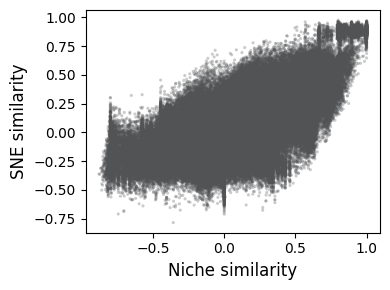

In [27]:
create_scatter_plot(get_upper_triangle_values(df_sim_randomE), get_upper_triangle_values(df_sim_embedding), scatter_size=5, scatter_color=(82/255,83/255,85/255),
                    x_label='Niche similarity', y_label='SNE similarity', scatter_alpha=0.3, figure_size=(4, 3)) 

In [45]:
# df_plot_scatter = pd.DataFrame({'Niche similarity': get_upper_triangle_values(df_sim_randomE), 
#            'SNE similarity': get_upper_triangle_values(df_sim_embedding)})
# df_plot_scatter.to_csv('df_plot_similarity_scatter.csv', index=False)

## 分析共现值矩阵

In [28]:
df_cooccurence_matrix

,GlobalSpecies0001,GlobalSpecies0002,GlobalSpecies0003,GlobalSpecies0004,GlobalSpecies0005,GlobalSpecies0006,GlobalSpecies0007,GlobalSpecies0008,GlobalSpecies0009,GlobalSpecies0010,...,GlobalSpecies0991,GlobalSpecies0992,GlobalSpecies0993,GlobalSpecies0994,GlobalSpecies0995,GlobalSpecies0996,GlobalSpecies0997,GlobalSpecies0998,GlobalSpecies0999,GlobalSpecies1000
GlobalSpecies0001,0.000000,982.283149,51.946205,298.870658,415.212288,182.258489,196.317863,3683.735803,155.055011,602.842541,...,2126.536518,637.497008,1654.431224,436.010491,997.032039,547.150709,958.811492,787.868351,768.459495,46.303697
GlobalSpecies0002,982.283149,0.000000,25.928067,211.983942,267.145899,105.461245,114.226690,2422.619797,96.475036,366.369053,...,1331.670117,396.478642,1126.046944,358.638028,642.739469,341.044972,763.469702,495.148264,495.053083,44.590657
GlobalSpecies0003,51.946205,25.928067,0.000000,9.797192,15.655479,5.647195,4.388413,99.158415,6.623100,12.498262,...,47.954085,13.324346,50.485210,16.583384,30.269031,13.245924,36.224225,19.711109,15.627530,1.256212
GlobalSpecies0004,298.870658,211.983942,9.797192,0.000000,69.827720,29.145955,41.203681,775.291072,24.370907,113.950029,...,375.073636,97.639603,279.763225,62.120677,207.532686,130.844128,156.539539,157.717732,152.350229,12.469573
GlobalSpecies0005,415.212288,267.145899,15.655479,69.827720,0.000000,125.028449,52.747631,1046.890207,38.823904,140.047201,...,631.383760,319.666020,439.181039,138.153019,238.384842,140.580523,302.054081,188.371702,182.584510,11.190974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GlobalSpecies0996,547.150709,341.044972,13.245924,130.844128,140.580523,71.803253,70.395746,1418.193337,54.265076,315.735163,...,883.092918,230.901386,617.049448,159.574870,537.510216,0.000000,354.508148,261.899084,325.309299,19.208825
GlobalSpecies0997,958.811492,763.469702,36.224225,156.539539,302.054081,128.126726,111.927302,2434.894070,89.600391,333.212479,...,1428.546757,455.779023,1017.064415,473.752059,571.919465,354.508148,0.000000,410.394790,386.527623,23.052825
GlobalSpecies0998,787.868351,495.148264,19.711109,157.717732,188.371702,83.578535,97.685924,1869.134046,64.353092,299.276202,...,1046.297979,281.129265,826.324057,177.571201,456.862897,261.899084,410.394790,0.000000,391.657464,25.956702
GlobalSpecies0999,768.459495,495.053083,15.627530,152.350229,182.584510,78.986282,92.967297,1536.817756,91.980881,358.373625,...,1099.520549,245.878473,993.617997,175.241637,634.979224,325.309299,386.527623,391.657464,0.000000,25.093259


In [29]:
(df_cooccurence_matrix>0).sum().sum()

996920

In [30]:
Xi = np.sum(df_cooccurence_matrix, axis=1)

# 计算共现概率矩阵 P, P 中的元素 P_ij = X_ij / X_i
P = (df_cooccurence_matrix / Xi[:, np.newaxis]).T

/tmp/ipykernel_7207/1732964219.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  P = (df_cooccurence_matrix / Xi[:, np.newaxis]).T


In [31]:
P

,GlobalSpecies0001,GlobalSpecies0002,GlobalSpecies0003,GlobalSpecies0004,GlobalSpecies0005,GlobalSpecies0006,GlobalSpecies0007,GlobalSpecies0008,GlobalSpecies0009,GlobalSpecies0010,...,GlobalSpecies0991,GlobalSpecies0992,GlobalSpecies0993,GlobalSpecies0994,GlobalSpecies0995,GlobalSpecies0996,GlobalSpecies0997,GlobalSpecies0998,GlobalSpecies0999,GlobalSpecies1000
GlobalSpecies0001,0.000000,0.001877,0.002465,0.002049,0.001957,0.001932,0.002053,0.001949,0.002019,0.001997,...,0.001936,0.002039,0.001910,0.001989,0.001873,0.001872,0.001981,0.002055,0.001941,0.001705
GlobalSpecies0002,0.001214,0.000000,0.001230,0.001454,0.001259,0.001118,0.001194,0.001282,0.001257,0.001214,...,0.001213,0.001268,0.001300,0.001636,0.001208,0.001167,0.001578,0.001292,0.001250,0.001642
GlobalSpecies0003,0.000064,0.000050,0.000000,0.000067,0.000074,0.000060,0.000046,0.000052,0.000086,0.000041,...,0.000044,0.000043,0.000058,0.000076,0.000057,0.000045,0.000075,0.000051,0.000039,0.000046
GlobalSpecies0004,0.000369,0.000405,0.000465,0.000000,0.000329,0.000309,0.000431,0.000410,0.000317,0.000377,...,0.000342,0.000312,0.000323,0.000283,0.000390,0.000448,0.000323,0.000411,0.000385,0.000459
GlobalSpecies0005,0.000513,0.000511,0.000743,0.000479,0.000000,0.001325,0.000551,0.000554,0.000506,0.000464,...,0.000575,0.001022,0.000507,0.000630,0.000448,0.000481,0.000624,0.000491,0.000461,0.000412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GlobalSpecies0996,0.000676,0.000652,0.000629,0.000897,0.000662,0.000761,0.000736,0.000750,0.000707,0.001046,...,0.000804,0.000739,0.000712,0.000728,0.001010,0.000000,0.000733,0.000683,0.000822,0.000707
GlobalSpecies0997,0.001185,0.001459,0.001719,0.001073,0.001423,0.001358,0.001170,0.001288,0.001167,0.001104,...,0.001301,0.001458,0.001174,0.002161,0.001075,0.001213,0.000000,0.001071,0.000976,0.000849
GlobalSpecies0998,0.000974,0.000946,0.000935,0.001082,0.000888,0.000886,0.001021,0.000989,0.000838,0.000991,...,0.000953,0.000899,0.000954,0.000810,0.000858,0.000896,0.000848,0.000000,0.000989,0.000956
GlobalSpecies0999,0.000950,0.000946,0.000742,0.001045,0.000860,0.000837,0.000972,0.000813,0.001198,0.001187,...,0.001001,0.000786,0.001147,0.000799,0.001193,0.001113,0.000799,0.001022,0.000000,0.000924


In [32]:
df_sim_randomE

,GlobalSpecies0001,GlobalSpecies0002,GlobalSpecies0003,GlobalSpecies0004,GlobalSpecies0005,GlobalSpecies0006,GlobalSpecies0007,GlobalSpecies0008,GlobalSpecies0009,GlobalSpecies0010,...,GlobalSpecies0991,GlobalSpecies0992,GlobalSpecies0993,GlobalSpecies0994,GlobalSpecies0995,GlobalSpecies0996,GlobalSpecies0997,GlobalSpecies0998,GlobalSpecies0999,GlobalSpecies1000
GlobalSpecies0001,1.000000,-0.219629,0.196638,0.154127,0.000000,0.000000,0.321753,0.166550,0.000000,-0.159772,...,0.114321,-0.307461,0.202198,-0.333101,-0.198872,-0.228642,-0.318980,0.343916,0.059335,0.243063
GlobalSpecies0002,-0.219629,1.000000,0.068901,0.346307,-0.203996,0.000000,0.000000,-0.263739,-0.298040,0.000000,...,0.000000,0.000000,0.012820,0.323482,0.000000,0.000000,0.546664,-0.204106,0.139514,0.123567
GlobalSpecies0003,0.196638,0.068901,1.000000,0.000000,0.258149,0.000000,0.000000,-0.251922,0.000000,0.000000,...,0.000000,-0.264376,-0.501222,0.761993,0.000000,0.000000,0.522171,0.594272,-0.176549,-0.592502
GlobalSpecies0004,0.154127,0.346307,0.000000,1.000000,0.000000,0.000000,0.574626,0.452737,-0.232390,0.302822,...,-0.216677,0.000000,-0.121826,0.000000,0.376928,0.206985,-0.049729,0.394261,-0.080975,0.470239
GlobalSpecies0005,0.000000,-0.203996,0.258149,0.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.800000,-0.226694,0.200000,0.000000,0.000000,-0.322748,0.550483,-0.136781,-0.174200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GlobalSpecies0996,-0.228642,0.000000,0.000000,0.206985,0.000000,0.000000,-0.263263,-0.400000,0.000000,0.559031,...,-0.400000,0.000000,-0.224898,0.000000,0.695835,1.000000,-0.091802,-0.115757,0.642747,-0.187584
GlobalSpecies0997,-0.318980,0.546664,0.522171,-0.049729,-0.322748,-0.322748,0.000000,-0.414550,0.000000,-0.064150,...,0.045901,-0.322748,-0.317483,0.829100,-0.079849,-0.091802,1.000000,-0.082656,-0.035604,-0.604993
GlobalSpecies0998,0.343916,-0.204106,0.594272,0.394261,0.550483,0.078512,0.160013,0.231515,-0.099585,0.148886,...,0.252736,0.092776,-0.183573,0.345603,0.000000,-0.115757,-0.082656,1.000000,-0.262796,-0.081922
GlobalSpecies0999,0.059335,0.139514,-0.176549,-0.080975,-0.136781,-0.138396,-0.468985,-0.664953,0.236450,0.227611,...,0.121657,0.000000,0.295784,-0.136781,0.435970,0.642747,-0.035604,-0.262796,1.000000,-0.192701


In [33]:
np.quantile(get_upper_triangle_values(df_sim_randomE), [0.9,0.95,0.99])

array([0.49795675, 0.60048673, 0.81510395])

In [34]:
import pandas as pd
import numpy as np
import itertools
from tqdm import tqdm # 用于显示进度条，确保已安装: pip install tqdm

# align_dataframes 函数保持不变
def align_dataframes(df1: pd.DataFrame, df2: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    common_indices = df1.index.intersection(df2.index)
    common_columns = df1.columns.intersection(df2.columns)
    common_microbes = common_indices.intersection(common_columns)
    if common_microbes.empty: # 处理没有共同微生物的情况
        return pd.DataFrame(), pd.DataFrame()
    df1_aligned = df1.loc[common_microbes, common_microbes]
    df2_aligned = df2.loc[common_microbes, common_microbes]
    return df1_aligned, df2_aligned

# get_semantic_relationship 函数保持不变 (虽然其逻辑会被预计算替代)
def get_semantic_relationship(similarity_value: float, sim_high: float, sim_low: float) -> str:
    if similarity_value > sim_high:
        return "Sim"
    elif similarity_value < sim_low:
        return "Unsim"
    else:
        return "Neutral"

def precompute_semantic_relationship_matrix(df_sim_aligned: pd.DataFrame, 
                                            sim_high: float, 
                                            sim_low: float) -> pd.DataFrame:
    """
    预计算语义关系矩阵。
    """
    # 使用 applymap 或 NumPy 向量化操作来加速
    # 这里我们先用一个直接的 NumPy 方法
    sim_np = df_sim_aligned.to_numpy()
    rel_np = np.full(sim_np.shape, "Neutral", dtype=object) # 用 object dtype 存储字符串

    rel_np[sim_np > sim_high] = "Sim"
    rel_np[sim_np < sim_low] = "Unsim"
    
    # 对于 i=k 的情况 (对角线), 它们的关系通常不用于这个分析
    # 如果需要，可以在这里或之后处理，但三元组 i,j,k 保证它们互不相同
    # np.fill_diagonal(rel_np, "Self") # 示例

    return pd.DataFrame(rel_np, index=df_sim_aligned.index, columns=df_sim_aligned.columns)


def calculate_cooccurrence_ratio_stats(
    P: pd.DataFrame,
    df_sim: pd.DataFrame,
    sim_threshold_high: float = 0.8,
    sim_threshold_low: float = 0.1,
    epsilon: float = 1e-9
) -> dict[str, list[float]]:

    # 1. 对齐矩阵
    P_aligned, df_sim_aligned = align_dataframes(P, df_sim)

    if P_aligned.empty or df_sim_aligned.empty or len(P_aligned.index) < 3:
        print("警告: 对齐后的矩阵为空或共同微生物数量少于3，无法形成三元组。")
        return {
            "Sim_ik_Sim_jk": [], "Sim_ik_Unsim_jk": [],
            "Unsim_ik_Sim_jk": [], "Unsim_ik_Unsim_jk": []
        }

    microbes = P_aligned.index.tolist()
    num_microbes = len(microbes)

    # 创建微生物名称到整数索引的映射
    microbe_to_idx = {name: i for i, name in enumerate(microbes)}

    # 预计算语义关系矩阵并转换为NumPy数组
    print("预计算语义关系矩阵...")
    rel_matrix_pd = precompute_semantic_relationship_matrix(df_sim_aligned, sim_threshold_high, sim_threshold_low)
    rel_matrix_np = rel_matrix_pd.to_numpy()

    # 将共现概率矩阵P也转换为NumPy数组
    P_np = P_aligned.to_numpy()

    results = {
        "Sim_ik_Sim_jk": [],
        "Sim_ik_Unsim_jk": [],
        "Unsim_ik_Sim_jk": [],
        "Unsim_ik_Unsim_jk": [],
    }

    print(f"开始遍历约 {num_microbes**3} 个可能的三元组排列 (实际为 P({num_microbes},3))...")
    # 2. 遍历所有不同的微生物三元组的整数索引 (i_idx, j_idx, k_idx)
    # itertools.permutations 会生成所有顺序的排列，确保 i, j, k 不同
    # 我们迭代索引而不是名称，以直接用于NumPy数组
    total_permutations = num_microbes * (num_microbes - 1) * (num_microbes - 2) if num_microbes >=3 else 0

    for i_idx, j_idx, k_idx in tqdm(itertools.permutations(range(num_microbes), 3), total=total_permutations):
        # 获取 (i, k) 和 (j, k) 的语义相关性 (直接从预计算的NumPy矩阵中获取)
        rel_ik = rel_matrix_np[i_idx, k_idx]
        rel_jk = rel_matrix_np[j_idx, k_idx]

        if rel_ik == "Neutral" or rel_jk == "Neutral":
            continue

        P_ik_val = P_np[i_idx, k_idx]
        P_jk_val = P_np[j_idx, k_idx]
        
        ratio = P_ik_val / (P_jk_val + epsilon)

        if rel_ik == "Sim" and rel_jk == "Sim":
            results["Sim_ik_Sim_jk"].append(ratio)
        elif rel_ik == "Sim" and rel_jk == "Unsim":
            results["Sim_ik_Unsim_jk"].append(ratio)
        elif rel_ik == "Unsim" and rel_jk == "Sim":
            results["Unsim_ik_Sim_jk"].append(ratio)
        elif rel_ik == "Unsim" and rel_jk == "Unsim":
            results["Unsim_ik_Unsim_jk"].append(ratio)

    return results

In [47]:
results_cooccur = calculate_cooccurrence_ratio_stats(P, df_sim_randomE, sim_threshold_high=0.7, sim_threshold_low=0.1)

预计算语义关系矩阵...
开始遍历约 1000000000 个可能的三元组排列 (实际为 P(1000,3))...


  0%|          | 0/997002000 [00:00<?, ?it/s]

100%|██████████| 997002000/997002000 [03:24<00:00, 4879826.29it/s]


In [48]:
results_cooccur.keys()

dict_keys(['Sim_ik_Sim_jk', 'Sim_ik_Unsim_jk', 'Unsim_ik_Sim_jk', 'Unsim_ik_Unsim_jk'])

In [49]:
len(results_cooccur['Sim_ik_Sim_jk']), len(results_cooccur['Sim_ik_Unsim_jk']), len(results_cooccur['Unsim_ik_Sim_jk']), len(results_cooccur['Unsim_ik_Unsim_jk'])

(638318, 14250688, 14250688, 360904784)

In [50]:
# results_cooccur_loged = {key: [np.log10(v) for v in value] for key, value in results_cooccur.items()}

In [51]:
import random 

results_cooccur_sampled = {key: random.sample(value, min(len(results_cooccur['Sim_ik_Sim_jk']), len(value))) for key, value in results_cooccur.items()}

In [52]:
results_cooccur_sampled_loged = {key: [np.log10(v) for v in value] for key, value in results_cooccur_sampled.items()}

/tmp/ipykernel_7207/3461699179.py:1: RuntimeWarning: divide by zero encountered in log10
  results_cooccur_sampled_loged = {key: [np.log10(v) for v in value] for key, value in results_cooccur_sampled.items()}


In [53]:
def transform_results_to_df_plot(results_dict: dict[str, list[float]], 
                                 apply_log10: bool = False,
                                 epsilon_log: float = 1e-9) -> pd.DataFrame:
    """
    将 calculate_cooccurrence_ratio_stats 函数返回的字典结果
    转换为适用于绘图的长格式 Pandas DataFrame。

    参数:
    results_dict (dict): 包含四个类别及其对应比值列表的字典。
    apply_log10 (bool): 是否对比值进行 log10 转换。默认为 True。
    epsilon_log (float): 在进行 log10 转换前加到比值上的小量，以避免 log(0) 或 log(负数) 的错误。
                         仅在 apply_log10 为 True 时使用。
                         注意：如果原始ratio可能为负（例如 P_jk 远大于 P_ik 且 epsilon 不足以使其为正，
                         或者P_ik/P_jk本身为负，尽管在共现概率中不常见），log10会出问题。
                         通常共现概率 P_ik, P_jk > 0, epsilon保证分母 > 0, 所以ratio > 0。

    返回:
    pd.DataFrame: 一个包含两列的DataFrame: 'category' 和 'value' (或 'log10_ratio' 如果应用了对数转换)。
    """
    
    plot_data_list = []
    value_column_name = 'log10_ratio' if apply_log10 else 'ratio'

    for category, ratios in results_dict.items():
        if not ratios: # 如果某个类别的列表为空，跳过
            print(f"警告: 类别 '{category}' 没有数据点。")
            continue
        
        for ratio_val in ratios:
            if apply_log10:
                # 确保 ratio_val + epsilon_log > 0, 否则 log10 会出错
                # 原始的 ratio = P_ik_val / (P_jk_val + epsilon) 应该总是正数，
                # 因为 P_ik_val, P_jk_val 是概率（或类似概率的值）>=0，且分母有epsilon。
                if ratio_val <= 0 and ratio_val + epsilon_log <=0 : # 处理非常小的负ratio（理论上不应发生）或0
                    print(f"警告: 在类别 '{category}' 中遇到非正比值 {ratio_val}，log10转换时将使用非常小的值代替。")
                    # 可以选择跳过这个值，或者用一个非常小的正数来代替以避免log错误
                    value_to_log = 1e-12 # 一个极小值
                elif ratio_val + epsilon_log <=0: # 如果ratio_val本身是负的
                     value_to_log = epsilon_log # 使用epsilon_log作为下限
                else:
                    value_to_log = ratio_val + epsilon_log # 为正的ratio也加上epsilon，确保一致性，虽然主要为0设计
                
                transformed_value = np.log10(value_to_log)

            else:
                transformed_value = ratio_val
            
            plot_data_list.append({'category': category, value_column_name: transformed_value})
    
    if not plot_data_list:
        print("警告: 没有可供转换的数据点，返回空的DataFrame。")
        return pd.DataFrame(columns=['category', value_column_name])
        
    df_plot = pd.DataFrame(plot_data_list)
    return df_plot

In [54]:

df_plot = transform_results_to_df_plot(results_cooccur_sampled, apply_log10=False)

In [55]:
df_plot

,category,ratio
0,Sim_ik_Sim_jk,0.188643
1,Sim_ik_Sim_jk,2.243341
2,Sim_ik_Sim_jk,1.505721
3,Sim_ik_Sim_jk,0.166919
4,Sim_ik_Sim_jk,0.241721
...,...,...
2553267,Unsim_ik_Unsim_jk,0.531135
2553268,Unsim_ik_Unsim_jk,2.758389
2553269,Unsim_ik_Unsim_jk,20.933321
2553270,Unsim_ik_Unsim_jk,1.190709


In [59]:
# import random
# for high_threshold in [0.7, 0.8, 0.9]:
#     for low_threshold in [0.0, 0.1, 0.2]:
#         results_cooccur = calculate_cooccurrence_ratio_stats(P, df_sim_randomE, sim_threshold_high=high_threshold, sim_threshold_low=low_threshold)
#         results_cooccur_sampled = {key: random.sample(value, min(len(results_cooccur['Sim_ik_Sim_jk']), len(value))) for key, value in results_cooccur.items()}
#         df_plot = transform_results_to_df_plot(results_cooccur_sampled, apply_log10=False)
#         df_plot.to_csv(f'plot_csvs/df_plot_ratio_{str(high_threshold).replace(".", "_")}_{str(low_threshold).replace(".", "_")}.csv')

预计算语义关系矩阵...
开始遍历约 1000000000 个可能的三元组排列 (实际为 P(1000,3))...


  8%|▊         | 76698650/997002000 [00:11<02:12, 6950257.29it/s]
Traceback (most recent call last):
  File "/opt/miniconda/envs/pytorch2.1/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_7207/1140906427.py", line 4, in <module>
    results_cooccur = calculate_cooccurrence_ratio_stats(P, df_sim_randomE, sim_threshold_high=high_threshold, sim_threshold_low=low_threshold)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_7207/3417499019.py", line -1, in calculate_cooccurrence_ratio_stats
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/miniconda/envs/pytorch2.1/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2120, in showtraceback
    stb = self.Interac

Unexpected exception formatting exception. Falling back to standard exception
